In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

['NanumGothic']


In [3]:
#데이터 불러오기#왼쪽 건우 5kg
rawData_LP_origin = pd.read_csv('data/5kg_gun_142832_left_pressure_data.txt', sep = ' ', names=['time','LP1','LP2','LP3', 'LP4', 'LP5', 'LP6','LP7'])
#rawData1 = rawData.set_index('time')
rawData_LP_origin.drop('time', axis=1, inplace=True)
rawData_LP=rawData_LP_origin.copy()
#rawData_LP.drop('time', axis=1, inplace=True)
rawData_LP['LP_sum']=rawData_LP_origin.sum(axis=1) #합계
rawData_LP['LP_mean']=rawData_LP_origin.mean(axis=1) #평균
rawData_LP['LP_std']=rawData_LP_origin.std(axis=1) #표준편차
rawData_LP['LP_var']=rawData_LP_origin.var(axis=1) #분산
rawData_LP['LP_min']=rawData_LP_origin.min(axis=1) #최소
rawData_LP['LP_max']=rawData_LP_origin.max(axis=1) #최대
rawData_LP['LP_sma']=rawData_LP['LP_mean'].rolling(window=5).mean() #이동평균
rawData_LP['LP_quantile']=rawData_LP_origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_LP['LP_median']= rawData_LP_origin.median(axis=1) # 중위값
rawData_LP['LP_mad']=rawData_LP_origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_LP['LP_skew'] = rawData_LP_origin.skew(axis=1) # 표본비대칭도
rawData_LP['LP_kurt'] = rawData_LP_origin.kurt(axis=1) # 표본첨도
rawData_LP['LP_sma']=rawData_LP['LP_sma'].fillna(rawData_LP['LP_sma'].mean())
rawData_LP.head(5)

,LP1,LP2,LP3,LP4,LP5,LP6,LP7,LP_sum,LP_mean,LP_std,LP_var,LP_min,LP_max,LP_sma,LP_quantile,LP_median,LP_mad,LP_skew,LP_kurt
0,33,12,11,13,11,9,9,98,14.000000,8.504901,72.333333,9,33,14.576973,11.0,11.0,5.428571,2.482819,6.351152
1,33,12,11,13,11,8,9,97,13.857143,8.610625,74.142857,8,33,14.576973,11.0,11.0,5.469388,2.428912,6.159275
2,32,12,11,13,11,8,9,96,13.714286,8.240435,67.904762,8,32,14.576973,11.0,11.0,5.224490,2.409117,6.084770
3,32,12,11,13,11,8,8,95,13.571429,8.343803,69.619048,8,32,14.576973,11.0,11.0,5.265306,2.359738,5.899529
4,32,12,11,13,11,8,8,95,13.571429,8.343803,69.619048,8,32,13.742857,11.0,11.0,5.265306,2.359738,5.899529


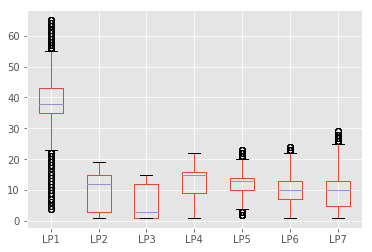

In [4]:
rawData_LP_origin.boxplot()

In [5]:
rawData_LP.describe()

,LP1,LP2,LP3,LP4,LP5,LP6,LP7,LP_sum,LP_mean,LP_std,LP_var,LP_min,LP_max,LP_sma,LP_quantile,LP_median,LP_mad,LP_skew,LP_kurt
count,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000
mean,39.044419,9.487472,6.095103,13.284738,12.694761,11.002847,10.431663,102.041002,14.577286,11.565524,148.084282,4.222665,39.044419,14.576973,12.415718,12.415718,7.237158,1.986084,4.832199
std,10.227178,5.970618,5.427960,4.624204,4.062362,5.097175,6.982550,29.628402,4.232629,3.785644,96.831993,3.973411,10.227178,4.210460,4.618711,4.618711,2.488777,0.443266,1.294765
min,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,14.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.028571,2.000000,2.000000,0.571429,0.974020,1.006901
25%,35.000000,3.000000,1.000000,9.000000,10.000000,7.000000,5.000000,75.000000,10.714286,9.322910,86.916667,1.000000,35.000000,10.771429,8.750000,8.750000,5.836735,1.607663,3.922826
50%,38.000000,12.000000,3.000000,15.000000,13.000000,10.000000,10.000000,111.000000,15.857143,10.723805,115.000000,1.000000,38.000000,15.828571,13.000000,13.000000,6.775510,2.146194,5.165831
75%,43.000000,15.000000,12.000000,16.000000,14.000000,13.000000,13.000000,119.000000,17.000000,13.625950,185.666667,8.000000,43.000000,17.000000,15.000000,15.000000,8.448980,2.365518,5.928072
max,65.000000,19.000000,15.000000,22.000000,23.000000,24.000000,29.000000,152.000000,21.714286,23.136242,535.285714,15.000000,65.000000,21.600000,23.000000,23.000000,16.775510,2.556153,6.646936


In [6]:
#오른쪽데이터
rawData_RP_origin = pd.read_csv('data/5kg_gun_142832_right_pressure_data.txt', sep = ' ', names=['time','RP1','RP2','RP3', 'RP4', 'RP5', 'RP6','RP7'])
"rawData1 = rawData.set_index('time')"
rawData_RP_origin.drop('time', axis=1, inplace=True)
rawData_RP=rawData_RP_origin.copy()
#rawData_RP.drop('time', axis=1, inplace=True)
rawData_RP['RP_sum']=rawData_RP_origin.sum(axis=1) #합계
rawData_RP['RP_mean']=rawData_RP_origin.mean(axis=1) #평균
rawData_RP['RP_std']=rawData_RP_origin.std(axis=1) #표준편차
rawData_RP['RP_var']=rawData_RP_origin.var(axis=1) #분산
rawData_RP['RP_min']=rawData_RP_origin.min(axis=1) #최소
rawData_RP['RP_max']=rawData_RP_origin.max(axis=1) #최대
rawData_RP['RP_sma']=rawData_RP['RP_mean'].rolling(window=5).mean() #이동평균
rawData_RP['RP_quantile']=rawData_RP_origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_RP['RP_median']= rawData_RP_origin.median(axis=1) # 중위값
rawData_RP['RP_mad']=rawData_RP_origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_RP['RP_skew'] = rawData_RP_origin.skew(axis=1) # 표본비대칭도
rawData_RP['RP_kurt'] = rawData_RP_origin.kurt(axis=1) # 표본첨도
rawData_RP['RP_sma']=rawData_RP['RP_sma'].fillna(rawData_RP['RP_sma'].mean())
rawData_RP.head(10)

,RP1,RP2,RP3,RP4,RP5,RP6,RP7,RP_sum,RP_mean,RP_std,RP_var,RP_min,RP_max,RP_sma,RP_quantile,RP_median,RP_mad,RP_skew,RP_kurt
0,27,33,32,29,24,21,50,216,30.857143,9.441550,89.142857,21,50,19.961498,29.0,29.0,6.408163,1.575313,3.185365
1,27,33,32,30,24,21,50,217,31.000000,9.416298,88.666667,21,50,19.961498,30.0,30.0,6.285714,1.525910,3.088089
2,27,33,32,30,24,21,50,217,31.000000,9.416298,88.666667,21,50,19.961498,30.0,30.0,6.285714,1.525910,3.088089
3,27,33,32,29,24,21,50,216,30.857143,9.441550,89.142857,21,50,19.961498,29.0,29.0,6.408163,1.575313,3.185365
4,27,33,32,30,24,21,51,218,31.142857,9.754120,95.142857,21,51,30.971429,30.0,30.0,6.448980,1.598154,3.311070
5,27,33,32,30,24,21,51,218,31.142857,9.754120,95.142857,21,51,31.028571,30.0,30.0,6.448980,1.598154,3.311070
6,28,33,32,29,24,21,51,218,31.142857,9.719886,94.476190,21,51,31.057143,29.0,29.0,6.448980,1.623158,3.425155
7,28,34,33,30,24,21,52,222,31.714286,10.078265,101.571429,21,52,31.200000,30.0,30.0,6.816327,1.508168,3.026580
8,28,34,33,29,24,21,53,222,31.714286,10.451703,109.238095,21,53,31.371429,29.0,29.0,7.102041,1.614100,3.292674
9,28,34,33,29,24,21,53,222,31.714286,10.451703,109.238095,21,53,31.485714,29.0,29.0,7.102041,1.614100,3.292674


In [7]:
rawData_RP.describe()

,RP1,RP2,RP3,RP4,RP5,RP6,RP7,RP_sum,RP_mean,RP_std,RP_var,RP_min,RP_max,RP_sma,RP_quantile,RP_median,RP_mad,RP_skew,RP_kurt
count,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000
mean,12.954520,22.173962,21.548607,19.308130,16.305287,12.544628,35.080159,139.915293,19.987899,8.518173,98.458621,7.811256,35.167709,19.961498,19.865833,19.865833,5.653491,0.650775,2.303263
std,13.721062,14.255166,13.452305,11.595304,9.656061,8.783590,21.297205,87.504150,12.500593,5.090588,85.455431,8.731663,21.154310,12.418234,12.286315,12.286315,3.418016,0.951042,1.786415
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.142857,0.000000,0.000000,0.000000,1.000000,0.142857,0.000000,0.000000,0.000000,-2.645751,-2.800000
25%,1.000000,6.000000,7.000000,7.000000,7.000000,3.000000,15.000000,46.000000,6.571429,4.105741,16.857143,1.000000,15.000000,6.828571,7.000000,7.000000,2.428571,-0.272243,1.880380
50%,1.000000,28.000000,27.000000,25.000000,20.000000,15.000000,44.000000,172.000000,24.571429,9.678154,93.666667,1.000000,44.000000,24.542857,25.000000,25.000000,6.530612,0.818438,2.462619
75%,28.000000,34.000000,32.000000,28.000000,24.000000,21.000000,53.000000,219.000000,31.285714,11.787806,138.952381,17.000000,53.000000,31.214286,29.000000,29.000000,8.000000,1.365056,3.015540
max,39.000000,44.000000,41.000000,35.000000,30.000000,26.000000,67.000000,249.000000,35.571429,20.256686,410.333333,26.000000,67.000000,35.428571,39.000000,39.000000,14.285714,2.645751,7.000000


In [13]:
#가속도데이터 불러오기, 수정
#데이터 합치기, 일부 Raw 삭제
#레이블입력하기 5,10,15
#모델 돌려보기

In [8]:
#데이터 불러오기
rawData_LA_origin = pd.read_csv('data/5kg_gun_142832_left_axis_data.txt', sep = ' ', names=['time','LAX','LAY','LAZ'])
rawData_LA_origin.drop('time', axis=1, inplace=True)
rawData_LA=rawData_LA_origin.copy()
rawData_LA['LA_sum']=rawData_LA_origin.sum(axis=1) #합계
rawData_LA['LA_mean']=rawData_LA_origin.mean(axis=1) #평균
rawData_LA['LA_std']=rawData_LA_origin.std(axis=1) #표준편차
rawData_LA['LA_var']=rawData_LA_origin.var(axis=1) #분산
rawData_LA['LA_min']=rawData_LA_origin.min(axis=1) #최소
rawData_LA['LA_max']=rawData_LA_origin.max(axis=1) #최대
rawData_LA['LA_sma']=rawData_LA['LA_mean'].rolling(window=5).mean() #이동평균
rawData_LA['LA_quantile']=rawData_LA_origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_LA['LA_median']= rawData_LA_origin.median(axis=1) # 중위값
rawData_LA['LA_mad']=rawData_LA_origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_LA['LA_skew'] = rawData_LA_origin.skew(axis=1) # 표본비대칭도
#rawData_LA['LA_kurt'] = rawData_LA_origin.kurt(axis=1) # 표본첨도
rawData_LA['LA_sma']=rawData_LA['LA_sma'].fillna(rawData_LA['LA_sma'].mean())
rawData_LA.head(5)

,LAX,LAY,LAZ,LA_sum,LA_mean,LA_std,LA_var,LA_min,LA_max,LA_sma,LA_quantile,LA_median,LA_mad,LA_skew
0,160,172,28,360,120.000000,79.899937,6384.000000,28,172,125.746119,160.0,160.0,61.333333,-1.688202
1,100,160,124,384,128.000000,30.199338,912.000000,100,160,125.746119,124.0,124.0,21.333333,0.585583
2,20,96,12,128,42.666667,46.360903,2149.333333,12,96,125.746119,20.0,20.0,35.555556,1.674210
3,16,80,108,204,68.000000,47.159304,2224.000000,16,108,125.746119,80.0,80.0,34.666667,-1.070915
4,212,244,212,668,222.666667,18.475209,341.333333,212,244,116.266667,212.0,212.0,14.222222,1.732051


In [11]:
rawData_LA.describe()

,LAX,LAY,LAZ,LA_sum,LA_mean,LA_std,LA_var,LA_min,LA_max,LA_sma,LA_quantile,LA_median,LA_mad,LA_skew
count,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1752.000000,1756.000000,1756.000000,1756.000000,1756.000000
mean,124.958998,126.496583,125.492027,376.947608,125.649203,68.883158,5626.991648,60.018223,191.334852,125.746119,125.594533,125.594533,50.709188,0.022507
std,72.531754,75.127269,76.344798,128.152027,42.717342,29.708666,4159.613828,48.738288,49.692061,23.007010,57.123046,57.123046,22.032175,1.243720
min,0.000000,0.000000,0.000000,24.000000,8.000000,0.000000,0.000000,0.000000,12.000000,30.933333,0.000000,0.000000,0.000000,-1.732051
25%,60.000000,60.000000,60.000000,292.000000,97.333333,46.832978,2193.333333,20.000000,160.000000,110.666667,80.000000,80.000000,34.666667,-1.269411
50%,128.000000,128.000000,124.000000,380.000000,126.666667,69.895160,4885.333333,48.000000,200.000000,126.133333,128.000000,128.000000,50.666667,0.000000
75%,184.000000,192.000000,192.000000,464.000000,154.666667,91.854834,8437.333333,92.000000,232.000000,141.400000,168.000000,168.000000,67.555556,1.293343
max,252.000000,252.000000,252.000000,724.000000,241.333333,140.873466,19845.333333,232.000000,252.000000,199.733333,252.000000,252.000000,108.444444,1.732051


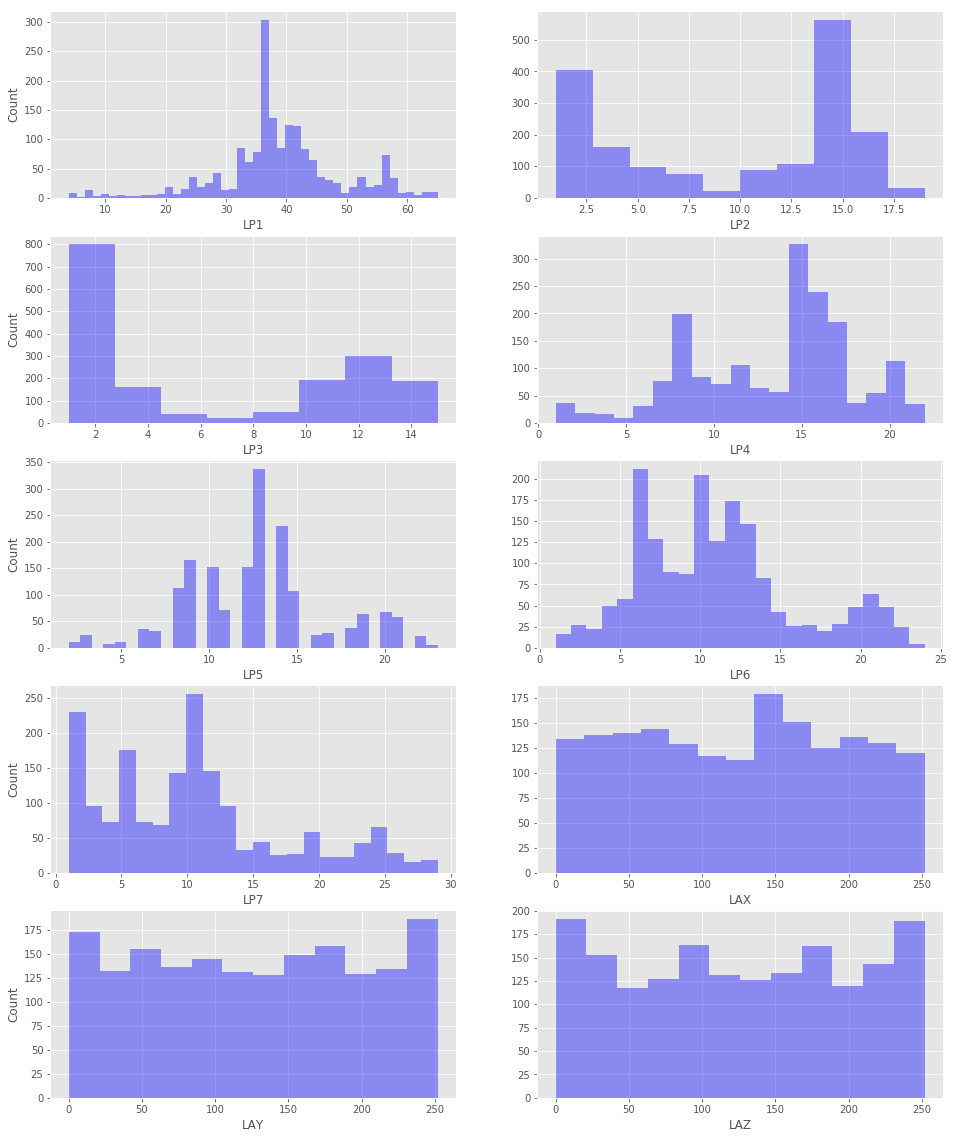

In [49]:
#데이터 합치기
#Press_Sensor=pd.merge(rawData_RP, rawData_LP, left_index=True,right_index=True)

In [9]:
#데이터 불러오기
rawData_RA_origin = pd.read_csv('data/5kg_gun_142832_right_axis_data.txt', sep = ' ', names=['time','RAX','RAY','RAZ'])
rawData_RA_origin.drop('time', axis=1, inplace=True)
rawData_RA=rawData_RA_origin.copy()
rawData_RA['RA_sum']=rawData_RA_origin.sum(axis=1) #합계
rawData_RA['RA_mean']=rawData_RA_origin.mean(axis=1) #평균
rawData_RA['RA_std']=rawData_RA_origin.std(axis=1) #표준편차
rawData_RA['RA_var']=rawData_RA_origin.var(axis=1) #분산
rawData_RA['RA_min']=rawData_RA_origin.min(axis=1) #최소
rawData_RA['RA_max']=rawData_RA_origin.max(axis=1) #최대
rawData_RA['RA_sma']=rawData_RA['RA_mean'].rolling(window=5).mean() #이동평균
rawData_RA['RA_quantile']=rawData_RA_origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_RA['RA_median']= rawData_RA_origin.median(axis=1) # 중위값
rawData_RA['RA_mad']=rawData_RA_origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_RA['RA_skew'] = rawData_RA_origin.skew(axis=1) # 표본비대칭도
#rawData_RA['RA_kurt'] = rawData_RA_origin.kurt(axis=1) # 표본첨도
rawData_RA['RA_sma']=rawData_RA['RA_sma'].fillna(rawData_RA['RA_sma'].mean())
rawData_RA.describe()

,RAX,RAY,RAZ,RA_sum,RA_mean,RA_std,RA_var,RA_min,RA_max,RA_sma,RA_quantile,RA_median,RA_mad,RA_skew
count,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000
mean,130.635588,128.702672,122.671973,382.010233,127.336744,69.018862,5645.013455,61.573621,192.850483,127.479430,127.586128,127.586128,50.834439,0.009499
std,70.907996,76.740819,74.991094,125.843240,41.947747,29.696996,4179.132165,49.147431,47.292134,23.041222,57.458432,57.458432,22.100837,1.250301
min,0.000000,0.000000,0.000000,16.000000,5.333333,2.309401,5.333333,0.000000,8.000000,52.266667,4.000000,4.000000,1.777778,-1.732051
25%,72.000000,60.000000,56.000000,292.000000,97.333333,47.017513,2210.666667,20.000000,160.000000,111.733333,88.000000,88.000000,33.777778,-1.293343
50%,132.000000,128.000000,120.000000,384.000000,128.000000,69.397406,4816.000000,52.000000,204.000000,127.200000,128.000000,128.000000,51.555556,0.000000
75%,190.000000,200.000000,188.000000,468.000000,156.000000,91.593304,8389.333333,92.000000,232.000000,142.933333,172.000000,172.000000,66.666667,1.264884
max,252.000000,252.000000,252.000000,736.000000,245.333333,140.930243,19861.333333,240.000000,252.000000,215.733333,252.000000,252.000000,108.444444,1.732051


In [36]:
#5kg 김건우 데이터 병합 #인덱스를 기준으로 병합하여 인덱스가 맡지 않는 3개는 날려버림..
Press_Sensor_5=pd.merge(rawData_RP, rawData_LP, left_index=True,right_index=True)
Accel_Sensor_5=pd.merge(rawData_RA, rawData_LA, left_index=True,right_index=True)
Sensor_data_5=pd.merge(Press_Sensor_5, Accel_Sensor_5, left_index=True,right_index=True)
Sensor_data_5['label']=5 # 5 = 5kg
#Sensor_data_5['subject']=1  #정명 = 1 
Press_Sensor_5.to_csv("data/data_namuk/Sensor_Press_data_gun_5.csv", mode='w')
Accel_Sensor_5.to_csv("data/data_namuk/Sensor_Accel_data_gun_5.csv", mode='w')
Sensor_data_5.to_csv("data/data_namuk/Sensor_data_gun_5.csv", mode='w')
Sensor_data_5.describe()

,RP1,RP2,RP3,RP4,RP5,RP6,RP7,RP_sum,RP_mean,RP_std,...,LA_std,LA_var,LA_min,LA_max,LA_sma,LA_quantile,LA_median,LA_mad,LA_skew,label
count,1756.000000,1756.00000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,...,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.0
mean,12.927107,22.15205,21.527335,19.289863,16.292141,12.533599,35.046697,139.768793,19.966970,8.513341,...,68.883158,5626.991648,60.018223,191.334852,125.746119,125.594533,125.594533,50.709188,0.022507,5.0
std,13.716724,14.25747,13.453935,11.596774,9.659064,8.787035,21.299976,87.506992,12.500999,5.093589,...,29.708666,4159.613828,48.738288,49.692061,22.980776,57.123046,57.123046,22.032175,1.243720,0.0
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.142857,0.000000,...,0.000000,0.000000,0.000000,12.000000,30.933333,0.000000,0.000000,0.000000,-1.732051,5.0
25%,1.000000,6.00000,7.000000,7.000000,7.000000,3.000000,15.000000,46.000000,6.571429,4.099942,...,46.832978,2193.333333,20.000000,160.000000,110.666667,80.000000,80.000000,34.666667,-1.269411,5.0
50%,1.000000,28.00000,27.000000,25.000000,20.000000,15.000000,44.000000,172.000000,24.571429,9.673233,...,69.895160,4885.333333,48.000000,200.000000,126.133333,128.000000,128.000000,50.666667,0.000000,5.0
75%,28.000000,33.00000,32.000000,28.000000,24.000000,21.000000,53.000000,218.250000,31.178571,11.788311,...,91.854834,8437.333333,92.000000,232.000000,141.333333,168.000000,168.000000,67.555556,1.293343,5.0
max,39.000000,44.00000,41.000000,35.000000,30.000000,26.000000,67.000000,249.000000,35.571429,20.256686,...,140.873466,19845.333333,232.000000,252.000000,199.733333,252.000000,252.000000,108.444444,1.732051,5.0


In [12]:
#김건우20kg 왼쪽압력데이터
rawData_LP_20origin = pd.read_csv('data/20kg_gun_141027_left_pressure_data.txt', sep = ' ', names=['time','LP1','LP2','LP3', 'LP4', 'LP5', 'LP6','LP7'])
#rawData1 = rawData.set_index('time')
rawData_LP_20origin.drop('time', axis=1, inplace=True)
rawData_LP_20=rawData_LP_20origin.copy()
rawData_LP_20['LP_sum']=rawData_LP_20origin.sum(axis=1) #합계
rawData_LP_20['LP_mean']=rawData_LP_20origin.mean(axis=1) #평균
rawData_LP_20['LP_std']=rawData_LP_20origin.std(axis=1) #표준편차
rawData_LP_20['LP_var']=rawData_LP_20origin.var(axis=1) #분산
rawData_LP_20['LP_min']=rawData_LP_20origin.min(axis=1) #최소
rawData_LP_20['LP_max']=rawData_LP_20origin.max(axis=1) #최대
rawData_LP_20['LP_sma']=rawData_LP_20['LP_mean'].rolling(window=5).mean() #이동평균
rawData_LP_20['LP_quantile']=rawData_LP_20origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_LP_20['LP_median']= rawData_LP_20origin.median(axis=1) # 중위값
rawData_LP_20['LP_mad']=rawData_LP_20origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_LP_20['LP_skew'] = rawData_LP_20origin.skew(axis=1) # 표본비대칭도
rawData_LP_20['LP_kurt'] = rawData_LP_20origin.kurt(axis=1) # 표본첨도
rawData_LP_20['LP_sma']=rawData_LP_20['LP_sma'].fillna(rawData_LP_20['LP_sma'].mean())#결측값수정
rawData_LP_20.describe()

,LP1,LP2,LP3,LP4,LP5,LP6,LP7,LP_sum,LP_mean,LP_std,LP_var,LP_min,LP_max,LP_sma,LP_quantile,LP_median,LP_mad,LP_skew,LP_kurt
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,12.200000,24.655682,24.576136,19.562500,19.071591,15.988636,34.994318,151.048864,21.578409,9.104736,102.890314,7.791477,36.218182,21.559762,21.924432,21.924432,6.244272,-0.018895,1.723408
std,13.688602,12.143339,11.461327,8.909791,8.474386,8.821319,20.489961,76.018227,10.859747,4.472746,75.735945,8.657282,18.997714,10.777408,10.495213,10.495213,3.050434,1.121215,1.860631
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.285714,0.000000,0.000000,0.000000,1.000000,0.285714,0.000000,0.000000,0.000000,-2.645751,-2.800000
25%,1.000000,17.000000,18.000000,14.000000,14.000000,8.000000,15.000000,89.000000,12.714286,6.698428,44.869048,1.000000,20.000000,12.650000,15.000000,15.000000,4.969388,-0.822884,0.163792
50%,1.000000,28.000000,28.000000,23.000000,21.000000,19.000000,43.000000,171.000000,24.428571,10.047506,100.952381,1.000000,43.000000,24.400000,26.000000,26.000000,6.775510,-0.072644,2.146559
75%,27.000000,33.000000,32.000000,26.000000,25.000000,23.000000,51.000000,214.000000,30.571429,12.259107,150.285714,15.000000,51.000000,30.607143,28.000000,28.000000,7.795918,0.923895,2.981666
max,42.000000,46.000000,44.000000,34.000000,32.000000,29.000000,65.000000,250.000000,35.714286,19.697716,388.000000,26.000000,65.000000,35.628571,42.000000,42.000000,14.285714,2.645751,7.000000


In [38]:
#결측값 확인하기
#rawData_LP_20.isna().sum()

In [13]:
#김건우20kg 압력데이터 오른쪽
rawData_RP_20origin = pd.read_csv('data/20kg_gun_141027_right_pressure_data.txt', sep = ' ', names=['time','RP1','RP2','RP3', 'RP4', 'RP5', 'RP6','RP7'])
#rawData1 = rawData.set_index('time')
rawData_RP_20origin.drop('time', axis=1, inplace=True)
rawData_RP_20=rawData_RP_20origin.copy()
rawData_RP_20['RP_sum']=rawData_RP_20origin.sum(axis=1) #합계
rawData_RP_20['RP_mean']=rawData_RP_20origin.mean(axis=1) #평균
rawData_RP_20['RP_std']=rawData_RP_20origin.std(axis=1) #표준편차
rawData_RP_20['RP_var']=rawData_RP_20origin.var(axis=1) #분산
rawData_RP_20['RP_min']=rawData_RP_20origin.min(axis=1) #최소
rawData_RP_20['RP_max']=rawData_RP_20origin.max(axis=1) #최대
rawData_RP_20['RP_sma']=rawData_RP_20['RP_mean'].rolling(window=5).mean() #이동평균
rawData_RP_20['RP_quantile']=rawData_RP_20origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_RP_20['RP_median']= rawData_RP_20origin.median(axis=1) # 중위값
rawData_RP_20['RP_mad']=rawData_RP_20origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_RP_20['RP_skew'] = rawData_RP_20origin.skew(axis=1) # 표본비대칭도
rawData_RP_20['RP_kurt'] = rawData_RP_20origin.kurt(axis=1) # 표본첨도
rawData_RP_20['RP_sma']=rawData_RP_20['RP_sma'].fillna(rawData_RP_20['RP_sma'].mean())#결측값수정
rawData_RP_20.describe()

,RP1,RP2,RP3,RP4,RP5,RP6,RP7,RP_sum,RP_mean,RP_std,RP_var,RP_min,RP_max,RP_sma,RP_quantile,RP_median,RP_mad,RP_skew,RP_kurt
count,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000
mean,38.171510,9.511681,4.050142,14.252991,13.526496,11.046724,11.980057,102.539601,14.648514,11.339166,142.891792,3.113390,38.171510,14.650632,12.826211,12.826211,6.998663,1.772999,4.277236
std,11.243277,5.406008,4.560351,4.513736,4.479493,5.565212,7.121454,32.905258,4.700751,3.784610,83.424283,3.352056,11.243277,4.669824,5.082781,5.082781,2.346131,0.449206,1.185585
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,1.000000,11.000000,10.000000,6.000000,6.000000,78.000000,11.142857,9.511897,90.476190,1.000000,33.000000,11.228571,9.000000,9.000000,5.959184,1.389039,3.533391
50%,40.000000,11.000000,1.000000,16.000000,14.000000,11.000000,11.000000,114.000000,16.285714,11.596387,134.476190,1.000000,40.000000,16.342857,14.000000,14.000000,7.061224,1.857599,4.290145
75%,44.000000,14.000000,6.000000,17.000000,16.000000,15.000000,18.000000,122.500000,17.500000,13.158376,173.142857,5.000000,44.000000,17.485714,16.000000,16.000000,8.000000,2.183347,5.232039
max,60.000000,19.000000,16.000000,23.000000,22.000000,22.000000,27.000000,155.000000,22.142857,20.163616,406.571429,16.000000,60.000000,22.000000,22.000000,22.000000,13.755102,2.645751,7.000000


In [14]:
#김건우20kg 가속도 데이터 왼쪽
rawData_LA_20origin = pd.read_csv('data/20kg_gun_141027_left_axis_data.txt', sep = ' ', names=['time','LAX','LAY','LAZ'])
#rawData1 = rawData.set_index('time')
rawData_LA_20origin.drop('time', axis=1, inplace=True)
rawData_LA_20=rawData_LA_20origin.copy()
rawData_LA_20['LA_sum']=rawData_LA_20origin.sum(axis=1) #합계
rawData_LA_20['LA_mean']=rawData_LA_20origin.mean(axis=1) #평균
rawData_LA_20['LA_std']=rawData_LA_20origin.std(axis=1) #표준편차
rawData_LA_20['LA_var']=rawData_LA_20origin.var(axis=1) #분산
rawData_LA_20['LA_min']=rawData_LA_20origin.min(axis=1) #최소
rawData_LA_20['LA_max']=rawData_LA_20origin.max(axis=1) #최대
rawData_LA_20['LA_sma']=rawData_LA_20['LA_mean'].rolling(window=5).mean() #이동평균
rawData_LA_20['LA_quantile']=rawData_LA_20origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_LA_20['LA_median']= rawData_LA_20origin.median(axis=1) # 중위값
rawData_LA_20['LA_mad']=rawData_LA_20origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_LA_20['LA_skew'] = rawData_LA_20origin.skew(axis=1) # 표본비대칭도
#rawData_LA_20['LA_kurt'] = rawData_LA_20origin.kurt(axis=1) # 표본첨도 - 가속도값에서 NAN으로 나와 삭제
rawData_LA_20['LA_sma']=rawData_LA_20['LA_sma'].fillna(rawData_LA_20['LA_sma'].mean())#결측값수정
rawData_LA_20.describe()

,LAX,LAY,LAZ,LA_sum,LA_mean,LA_std,LA_var,LA_min,LA_max,LA_sma,LA_quantile,LA_median,LA_mad,LA_skew
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,118.938636,123.427273,126.009091,368.375000,122.791667,65.769633,5291.260606,60.656818,185.438636,122.916629,122.279545,122.279545,48.640404,0.014890
std,76.913222,70.762527,73.281625,131.113551,43.704517,31.083194,4283.646354,48.590039,52.563729,23.759027,58.350524,58.350524,23.356938,1.269096
min,0.000000,0.000000,0.000000,24.000000,8.000000,2.309401,5.333333,0.000000,12.000000,42.400000,0.000000,0.000000,1.777778,-1.732051
25%,52.000000,68.000000,60.000000,272.000000,90.666667,40.857476,1669.333333,24.000000,148.000000,108.533333,76.000000,76.000000,29.333333,-1.265265
50%,112.000000,116.000000,128.000000,368.000000,122.666667,65.482822,4288.000000,48.000000,196.000000,123.733333,120.000000,120.000000,48.000000,0.000000
75%,188.000000,184.000000,188.000000,464.000000,154.666667,90.244055,8144.000000,88.000000,228.000000,139.200000,168.000000,168.000000,66.666667,1.329404
max,252.000000,252.000000,252.000000,744.000000,248.000000,142.042247,20176.000000,244.000000,252.000000,199.733333,252.000000,252.000000,109.333333,1.732051


In [15]:
#김건우20kg 가속도 데이터 오른쪽
rawData_RA_20origin = pd.read_csv('data/20kg_gun_141027_right_axis_data.txt', sep = ' ', names=['time','RAX','RAY','RAZ'])
#rawData1 = rawData.set_index('time')
rawData_RA_20origin.drop('time', axis=1, inplace=True)
rawData_RA_20=rawData_RA_20origin.copy()
rawData_RA_20['RA_sum']=rawData_RA_20origin.sum(axis=1) #합계
rawData_RA_20['RA_mean']=rawData_RA_20origin.mean(axis=1) #평균
rawData_RA_20['RA_std']=rawData_RA_20origin.std(axis=1) #표준편차
rawData_RA_20['RA_var']=rawData_RA_20origin.var(axis=1) #분산
rawData_RA_20['RA_min']=rawData_RA_20origin.min(axis=1) #최소
rawData_RA_20['RA_max']=rawData_RA_20origin.max(axis=1) #최대
rawData_RA_20['RA_sma']=rawData_RA_20['RA_mean'].rolling(window=5).mean() #이동평균
rawData_RA_20['RA_quantile']=rawData_RA_20origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_RA_20['RA_median']= rawData_RA_20origin.median(axis=1) # 중위값
rawData_RA_20['RA_mad']=rawData_RA_20origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_RA_20['RA_skew'] = rawData_RA_20origin.skew(axis=1) # 표본비대칭도
#rawData_LA_20['LA_kurt'] = rawData_LA_20origin.kurt(axis=1) # 표본첨도 - 가속도값에서 NAN으로 나와 삭제
rawData_RA_20['RA_sma']=rawData_RA_20['RA_sma'].fillna(rawData_RA_20['RA_sma'].mean())#결측값수정
rawData_RA_20.describe()

,RAX,RAY,RAZ,RA_sum,RA_mean,RA_std,RA_var,RA_min,RA_max,RA_sma,RA_quantile,RA_median,RA_mad,RA_skew
count,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000
mean,125.406268,132.225641,128.610826,386.242735,128.747578,68.815796,5639.886040,63.633048,194.338462,128.713040,128.271225,128.271225,50.814562,-0.008429
std,75.306206,75.197068,71.752207,125.033114,41.677705,30.079690,4243.907570,50.023869,47.270799,21.936264,56.685246,56.685246,22.549336,1.257072
min,0.000000,0.000000,0.000000,32.000000,10.666667,2.309401,5.333333,0.000000,24.000000,56.266667,4.000000,4.000000,1.777778,-1.732051
25%,60.000000,64.000000,68.000000,300.000000,100.000000,44.959241,2021.333333,24.000000,164.000000,113.866667,84.000000,84.000000,32.888889,-1.293343
50%,124.000000,140.000000,128.000000,384.000000,128.000000,68.973425,4757.333333,52.000000,208.000000,129.066667,132.000000,132.000000,50.666667,0.000000
75%,196.000000,200.000000,188.000000,476.000000,158.666667,91.476773,8368.000000,96.000000,232.000000,142.133333,172.000000,172.000000,67.555556,1.270537
max,252.000000,252.000000,252.000000,728.000000,242.666667,140.076170,19621.333333,232.000000,252.000000,199.200000,252.000000,252.000000,107.555556,1.732051


In [35]:
#20kg 압력과 가속도 데이터 병합
Sensor_data_20_P = pd.merge(rawData_LP_20, rawData_RP_20,left_index=True,right_index=True)
Sensor_data_20_A = pd.merge(rawData_LA_20, rawData_RA_20,left_index=True,right_index=True)
Sensor_data_20 = pd.merge(Sensor_data_20_P, Sensor_data_20_A,left_index=True,right_index=True)
Sensor_data_20['label']=20
Sensor_data_20.to_csv("data/data_namuk/Sensor_data_gun_20.csv", mode='w')
Sensor_data_20_P.to_csv("data/data_namuk/Sensor_Press_data_gun_20.csv", mode='w')
Sensor_data_20_A.to_csv("data/data_namuk/Sensor_Accel_data_gun_20.csv", mode='w')
Sensor_data_20.describe()

,LP1,LP2,LP3,LP4,LP5,LP6,LP7,LP_sum,LP_mean,LP_std,...,RA_std,RA_var,RA_min,RA_max,RA_sma,RA_quantile,RA_median,RA_mad,RA_skew,label
count,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,...,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.0
mean,12.170370,24.637607,24.557835,19.541311,19.057550,15.994302,34.954416,150.913390,21.559056,9.099895,...,68.815796,5639.886040,63.633048,194.338462,128.713040,128.271225,128.271225,50.814562,-0.008429,20.0
std,13.696791,12.155903,11.472511,8.913615,8.482364,8.833244,20.505476,76.084028,10.869147,4.478194,...,30.079690,4243.907570,50.023869,47.270799,21.936264,56.685246,56.685246,22.549336,1.257072,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.285714,0.000000,...,2.309401,5.333333,0.000000,24.000000,56.266667,4.000000,4.000000,1.777778,-1.732051,20.0
25%,1.000000,17.000000,18.000000,14.000000,14.000000,8.000000,15.000000,89.000000,12.714286,6.677966,...,44.959241,2021.333333,24.000000,164.000000,113.866667,84.000000,84.000000,32.888889,-1.293343,20.0
50%,1.000000,28.000000,28.000000,23.000000,21.000000,19.000000,43.000000,171.000000,24.428571,10.040395,...,68.973425,4757.333333,52.000000,208.000000,129.066667,132.000000,132.000000,50.666667,0.000000,20.0
75%,27.000000,33.000000,32.000000,26.000000,25.000000,23.000000,51.000000,214.000000,30.571429,12.259107,...,91.476773,8368.000000,96.000000,232.000000,142.133333,172.000000,172.000000,67.555556,1.270537,20.0
max,42.000000,46.000000,44.000000,34.000000,32.000000,29.000000,65.000000,250.000000,35.714286,19.697716,...,140.076170,19621.333333,232.000000,252.000000,199.200000,252.000000,252.000000,107.555556,1.732051,20.0


In [18]:
#김건우15kg 왼쪽압력데이터
rawData_LP_15origin = pd.read_csv('data/15kh_gun_141448_left_pressure_data.txt', sep = ' ', names=['time','LP1','LP2','LP3', 'LP4', 'LP5', 'LP6','LP7'])
#rawData1 = rawData.set_index('time')
rawData_LP_15origin.drop('time', axis=1, inplace=True)
rawData_LP_15=rawData_LP_15origin.copy()
rawData_LP_15['LP_sum']=rawData_LP_15origin.sum(axis=1) #합계
rawData_LP_15['LP_mean']=rawData_LP_15origin.mean(axis=1) #평균
rawData_LP_15['LP_std']=rawData_LP_15origin.std(axis=1) #표준편차
rawData_LP_15['LP_var']=rawData_LP_15origin.var(axis=1) #분산
rawData_LP_15['LP_min']=rawData_LP_15origin.min(axis=1) #최소
rawData_LP_15['LP_max']=rawData_LP_15origin.max(axis=1) #최대
rawData_LP_15['LP_sma']=rawData_LP_15['LP_mean'].rolling(window=5).mean() #이동평균
rawData_LP_15['LP_quantile']=rawData_LP_15origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_LP_15['LP_median']= rawData_LP_15origin.median(axis=1) # 중위값
rawData_LP_15['LP_mad']=rawData_LP_15origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_LP_15['LP_skew'] = rawData_LP_15origin.skew(axis=1) # 표본비대칭도
rawData_LP_15['LP_kurt'] = rawData_LP_15origin.kurt(axis=1) # 표본첨도
rawData_LP_15['LP_sma']=rawData_LP_15['LP_sma'].fillna(rawData_LP_15['LP_sma'].mean())#결측값수정
rawData_LP_15.describe()

,LP1,LP2,LP3,LP4,LP5,LP6,LP7,LP_sum,LP_mean,LP_std,LP_var,LP_min,LP_max,LP_sma,LP_quantile,LP_median,LP_mad,LP_skew,LP_kurt
count,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000
mean,9.896732,20.877124,20.617647,17.941830,16.326144,12.060131,34.018301,131.737908,18.819701,8.860188,106.436041,4.969281,34.055556,18.784273,19.029412,19.029412,5.727811,0.335808,2.350840
std,13.534726,13.799672,12.874128,10.448035,9.561691,8.682860,20.536899,82.362277,11.766040,5.286907,93.035779,7.141454,20.475931,11.659547,11.793616,11.793616,3.548186,0.886735,1.388817
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.142857,0.000000,0.000000,0.000000,1.000000,0.142857,0.000000,0.000000,0.000000,-2.645751,-2.800000
25%,1.000000,6.000000,8.000000,7.250000,7.000000,3.000000,14.000000,49.000000,7.000000,3.834360,14.702381,1.000000,14.000000,7.057143,7.000000,7.000000,2.418367,-0.412714,1.803993
50%,1.000000,24.000000,24.000000,22.000000,19.000000,11.000000,40.000000,153.000000,21.857143,9.727232,94.619048,1.000000,40.000000,21.142857,22.000000,22.000000,6.387755,0.190529,2.521942
75%,22.000000,33.000000,32.000000,26.000000,24.750000,21.000000,51.000000,209.000000,29.857143,12.644404,159.880952,7.000000,51.000000,29.771429,28.000000,28.000000,7.836735,0.929045,2.853955
max,39.000000,44.000000,40.000000,34.000000,31.000000,26.000000,66.000000,247.000000,35.285714,20.057061,402.285714,24.000000,66.000000,35.257143,39.000000,39.000000,14.367347,2.645751,7.000000


In [19]:
#김건우15kg 압력데이터 오른쪽
rawData_RP_15origin = pd.read_csv('data/15kh_gun_141448_right_pressure_data.txt', sep = ' ', names=['time','RP1','RP2','RP3', 'RP4', 'RP5', 'RP6','RP7'])
#rawData1 = rawData.set_index('time')
rawData_RP_15origin.drop('time', axis=1, inplace=True)
rawData_RP_15=rawData_RP_15origin.copy()
rawData_RP_15['RP_sum']=rawData_RP_15origin.sum(axis=1) #합계
rawData_RP_15['RP_mean']=rawData_RP_15origin.mean(axis=1) #평균
rawData_RP_15['RP_std']=rawData_RP_15origin.std(axis=1) #표준편차
rawData_RP_15['RP_var']=rawData_RP_15origin.var(axis=1) #분산
rawData_RP_15['RP_min']=rawData_RP_15origin.min(axis=1) #최소
rawData_RP_15['RP_max']=rawData_RP_15origin.max(axis=1) #최대
rawData_RP_15['RP_sma']=rawData_RP_15['RP_mean'].rolling(window=5).mean() #이동평균
rawData_RP_15['RP_quantile']=rawData_RP_15origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_RP_15['RP_median']= rawData_RP_15origin.median(axis=1) # 중위값
rawData_RP_15['RP_mad']=rawData_RP_15origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_RP_15['RP_skew'] = rawData_RP_15origin.skew(axis=1) # 표본비대칭도
rawData_RP_15['RP_kurt'] = rawData_RP_15origin.kurt(axis=1) # 표본첨도
rawData_RP_15['RP_sma']=rawData_RP_15['RP_sma'].fillna(rawData_RP_15['RP_sma'].mean())#결측값수정
rawData_RP_15.describe()

,RP1,RP2,RP3,RP4,RP5,RP6,RP7,RP_sum,RP_mean,RP_std,RP_var,RP_min,RP_max,RP_sma,RP_quantile,RP_median,RP_mad,RP_skew,RP_kurt
count,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000
mean,40.049771,9.017027,4.100196,14.085789,13.569090,11.814014,12.198428,104.834316,14.976331,12.047830,161.682633,2.944990,40.049771,14.983679,13.022921,13.022921,7.439317,1.791025,4.316253
std,11.916601,5.709524,4.833917,5.061985,4.618929,5.768536,7.723213,34.559132,4.937019,4.067341,90.187641,3.412776,11.916601,4.901577,5.239118,5.239118,2.571587,0.457281,1.277757
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.114286,1.000000,1.000000,0.000000,0.000000,-0.350000
25%,36.000000,3.000000,1.000000,10.000000,11.000000,7.000000,4.000000,80.000000,11.428571,9.695360,94.000000,1.000000,36.000000,11.485714,8.000000,8.000000,6.081633,1.404328,3.573952
50%,43.000000,10.000000,1.000000,16.000000,15.000000,13.000000,14.000000,119.000000,17.000000,12.763415,162.904762,1.000000,43.000000,16.942857,15.000000,15.000000,7.632653,1.817611,4.326165
75%,47.000000,14.000000,7.000000,18.000000,17.000000,16.000000,19.000000,129.000000,18.428571,14.727687,216.904762,4.000000,47.000000,18.428571,17.000000,17.000000,8.938776,2.208089,5.375808
max,63.000000,19.000000,16.000000,23.000000,22.000000,23.000000,28.000000,153.000000,21.857143,22.380902,500.904762,14.000000,63.000000,21.771429,22.000000,22.000000,16.040816,2.645751,7.000000


In [20]:
#김건우15kg 가속도데이터 왼쪽
rawData_LA_15origin = pd.read_csv('data/15kh_gun_141448_left_axis_data.txt', sep = ' ', names=['time','LAX','LAY','LAZ'])
#rawData1 = rawData.set_index('time')
rawData_LA_15origin.drop('time', axis=1, inplace=True)
rawData_LA_15=rawData_LA_15origin.copy()
rawData_LA_15['LA_sum']=rawData_LA_15origin.sum(axis=1) #합계
rawData_LA_15['LA_mean']=rawData_LA_15origin.mean(axis=1) #평균
rawData_LA_15['LA_std']=rawData_LA_15origin.std(axis=1) #표준편차
rawData_LA_15['LA_var']=rawData_LA_15origin.var(axis=1) #분산
rawData_LA_15['LA_min']=rawData_LA_15origin.min(axis=1) #최소
rawData_LA_15['LA_max']=rawData_LA_15origin.max(axis=1) #최대
rawData_LA_15['LA_sma']=rawData_LA_15['LA_mean'].rolling(window=5).mean() #이동평균
rawData_LA_15['LA_quantile']=rawData_LA_15origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_LA_15['LA_median']= rawData_LA_15origin.median(axis=1) # 중위값
rawData_LA_15['LA_mad']=rawData_LA_15origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_LA_15['LA_skew'] = rawData_LA_15origin.skew(axis=1) # 표본비대칭도
#rawData_LA_15['LA_kurt'] = rawData_LA_15origin.kurt(axis=1) # 표본첨도
rawData_LA_15['LA_sma']=rawData_LA_15['LA_sma'].fillna(rawData_LA_15['LA_sma'].mean())#결측값수정
rawData_LA_15.describe()

,LAX,LAY,LAZ,LA_sum,LA_mean,LA_std,LA_var,LA_min,LA_max,LA_sma,LA_quantile,LA_median,LA_mad,LA_skew
count,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000
mean,125.150327,127.728105,123.403922,376.282353,125.427451,67.969251,5466.377342,61.058824,190.423529,125.435736,124.800000,124.800000,50.109513,0.016890
std,72.200394,73.281020,72.534606,121.414656,40.471552,29.105188,4044.100863,47.471231,48.593168,21.707117,53.528064,53.528064,21.682484,1.251225
min,0.000000,0.000000,0.000000,12.000000,4.000000,2.309401,5.333333,0.000000,8.000000,55.466667,4.000000,4.000000,1.777778,-1.732051
25%,64.000000,68.000000,64.000000,296.000000,98.666667,45.166100,2040.000000,24.000000,160.000000,111.466667,84.000000,84.000000,32.888889,-1.264619
50%,124.000000,128.000000,124.000000,376.000000,125.333333,69.397406,4816.000000,52.000000,204.000000,125.517868,128.000000,128.000000,50.666667,0.027267
75%,184.000000,192.000000,184.000000,456.000000,152.000000,90.362234,8165.333333,88.000000,232.000000,139.733333,164.000000,164.000000,66.666667,1.288782
max,252.000000,252.000000,252.000000,712.000000,237.333333,139.733079,19525.333333,232.000000,252.000000,195.733333,252.000000,252.000000,107.555556,1.732051


In [21]:
#김건우15kg 가속도데이터 오른쪽
rawData_RA_15origin = pd.read_csv('data/15kh_gun_141448_right_axis_data.txt', sep = ' ', names=['time','RAX','RAY','RAZ'])
#rawData1 = rawData.set_index('time')
rawData_RA_15origin.drop('time', axis=1, inplace=True)
rawData_RA_15=rawData_RA_15origin.copy()
rawData_RA_15['RA_sum']=rawData_RA_15origin.sum(axis=1) #합계
rawData_RA_15['RA_mean']=rawData_RA_15origin.mean(axis=1) #평균
rawData_RA_15['RA_std']=rawData_RA_15origin.std(axis=1) #표준편차
rawData_RA_15['RA_var']=rawData_RA_15origin.var(axis=1) #분산
rawData_RA_15['RA_min']=rawData_RA_15origin.min(axis=1) #최소
rawData_RA_15['RA_max']=rawData_RA_15origin.max(axis=1) #최대
rawData_RA_15['RA_sma']=rawData_RA_15['RA_mean'].rolling(window=5).mean() #이동평균
rawData_RA_15['RA_quantile']=rawData_RA_15origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_RA_15['RA_median']= rawData_RA_15origin.median(axis=1) # 중위값
rawData_RA_15['RA_mad']=rawData_RA_15origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_RA_15['RA_skew'] = rawData_RA_15origin.skew(axis=1) # 표본비대칭도
#rawData_RA_15['RA_kurt'] = rawData_RA_15origin.kurt(axis=1) # 표본첨도
rawData_RA_15['RA_sma']=rawData_RA_15['RA_sma'].fillna(rawData_RA_15['RA_sma'].mean())#결측값수정
rawData_RA_15.describe()

,RAX,RAY,RAZ,RA_sum,RA_mean,RA_std,RA_var,RA_min,RA_max,RA_sma,RA_quantile,RA_median,RA_mad,RA_skew
count,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000
mean,128.243615,124.922069,126.988867,380.154551,126.718184,67.486153,5482.226588,63.117223,191.195809,126.766820,125.841519,125.841519,49.876737,0.033984
std,71.767744,75.652434,74.320155,127.648466,42.549489,30.470539,4257.486685,50.295757,48.543588,21.557550,57.517663,57.517663,22.824437,1.268383
min,0.000000,0.000000,0.000000,48.000000,16.000000,2.309401,5.333333,0.000000,20.000000,61.333333,4.000000,4.000000,1.777778,-1.732051
25%,68.000000,56.000000,60.000000,288.000000,96.000000,43.878620,1925.333333,24.000000,160.000000,112.533333,80.000000,80.000000,32.000000,-1.258571
50%,128.000000,124.000000,128.000000,380.000000,126.666667,66.813172,4464.000000,52.000000,204.000000,126.666667,128.000000,128.000000,49.777778,0.000000
75%,192.000000,192.000000,194.000000,468.000000,156.000000,90.789103,8242.666667,96.000000,232.000000,140.533333,172.000000,172.000000,66.666667,1.374457
max,252.000000,252.000000,252.000000,748.000000,249.333333,141.100437,19909.333333,244.000000,252.000000,198.933333,252.000000,252.000000,108.444444,1.732051


In [34]:
Sensor_data_15_P = pd.merge(rawData_LP_15, rawData_RP_15,left_index=True,right_index=True)
Sensor_data_15_A = pd.merge(rawData_LA_15, rawData_RA_15,left_index=True,right_index=True)
Sensor_data_15 = pd.merge(Sensor_data_15_P, Sensor_data_15_A,left_index=True,right_index=True)
Sensor_data_15['label']=15
Sensor_data_15.to_csv("data/data_namuk/Sensor_data_gun_15.csv", mode='w')
Sensor_data_15_P.to_csv("data/data_namuk/Sensor_Press_data_gun_15.csv", mode='w')
Sensor_data_15_A.to_csv("data/data_namuk/Sensor_Accel_data_gun_15.csv", mode='w')
Sensor_data_15.describe()

,LP1,LP2,LP3,LP4,LP5,LP6,LP7,LP_sum,LP_mean,LP_std,...,RA_std,RA_var,RA_min,RA_max,RA_sma,RA_quantile,RA_median,RA_mad,RA_skew,label
count,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,...,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.0
mean,9.865095,20.851343,20.593320,17.922069,16.311067,12.068762,33.977079,131.588736,18.798391,8.849763,...,67.486153,5482.226588,63.117223,191.195809,126.766820,125.841519,125.841519,49.876737,0.033984,15.0
std,13.529159,13.800945,12.875054,10.448768,9.565023,8.689178,20.535974,82.374293,11.767756,5.286856,...,30.470539,4257.486685,50.295757,48.543588,21.557550,57.517663,57.517663,22.824437,1.268383,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.142857,0.000000,...,2.309401,5.333333,0.000000,20.000000,61.333333,4.000000,4.000000,1.777778,-1.732051,15.0
25%,1.000000,6.000000,8.000000,7.000000,7.000000,3.000000,14.000000,49.000000,7.000000,3.829708,...,43.878620,1925.333333,24.000000,160.000000,112.533333,80.000000,80.000000,32.000000,-1.258571,15.0
50%,1.000000,24.000000,24.000000,22.000000,19.000000,12.000000,40.000000,153.000000,21.857143,9.719886,...,66.813172,4464.000000,52.000000,204.000000,126.666667,128.000000,128.000000,49.777778,0.000000,15.0
75%,22.000000,33.000000,32.000000,26.000000,25.000000,21.000000,51.000000,209.000000,29.857143,12.633101,...,90.789103,8242.666667,96.000000,232.000000,140.533333,172.000000,172.000000,66.666667,1.374457,15.0
max,39.000000,44.000000,40.000000,34.000000,31.000000,26.000000,66.000000,247.000000,35.285714,20.057061,...,141.100437,19909.333333,244.000000,252.000000,198.933333,252.000000,252.000000,108.444444,1.732051,15.0


In [23]:
#김건우10kg 왼쪽압력데이터
rawData_LP_10origin = pd.read_csv('data/10kg_gun_142440_left_pressure_data.txt', sep = ' ', names=['time','LP1','LP2','LP3', 'LP4', 'LP5', 'LP6','LP7'])
#rawData1 = rawData.set_index('time')
rawData_LP_10origin.drop('time', axis=1, inplace=True)
rawData_LP_10=rawData_LP_10origin.copy()
rawData_LP_10['LP_sum']=rawData_LP_10origin.sum(axis=1) #합계
rawData_LP_10['LP_mean']=rawData_LP_10origin.mean(axis=1) #평균
rawData_LP_10['LP_std']=rawData_LP_10origin.std(axis=1) #표준편차
rawData_LP_10['LP_var']=rawData_LP_10origin.var(axis=1) #분산
rawData_LP_10['LP_min']=rawData_LP_10origin.min(axis=1) #최소
rawData_LP_10['LP_max']=rawData_LP_10origin.max(axis=1) #최대
rawData_LP_10['LP_sma']=rawData_LP_10['LP_mean'].rolling(window=5).mean() #이동평균
rawData_LP_10['LP_quantile']=rawData_LP_10origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_LP_10['LP_median']= rawData_LP_10origin.median(axis=1) # 중위값
rawData_LP_10['LP_mad']=rawData_LP_10origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_LP_10['LP_skew'] = rawData_LP_10origin.skew(axis=1) # 표본비대칭도
rawData_LP_10['LP_kurt'] = rawData_LP_10origin.kurt(axis=1) # 표본첨도
rawData_LP_10['LP_sma']=rawData_LP_10['LP_sma'].fillna(rawData_LP_10['LP_sma'].mean())#결측값수정
rawData_LP_10.describe()

,LP1,LP2,LP3,LP4,LP5,LP6,LP7,LP_sum,LP_mean,LP_std,LP_var,LP_min,LP_max,LP_sma,LP_quantile,LP_median,LP_mad,LP_skew,LP_kurt
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,39.225711,9.561019,5.789692,14.048578,13.297986,11.555687,11.017180,104.495853,14.927979,11.543744,146.249379,4.132701,39.225711,14.926196,12.802133,12.802133,7.166844,1.932287,4.738505
std,9.677215,5.739541,5.373999,4.348757,4.000082,5.109748,7.091681,29.222284,4.174612,3.605420,90.328507,4.128657,9.677215,4.151245,4.562801,4.562801,2.286211,0.469887,1.299263
min,6.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,19.000000,2.714286,1.573592,2.476190,1.000000,6.000000,2.714286,3.000000,3.000000,1.020408,0.952577,1.723606
25%,35.000000,3.000000,1.000000,10.000000,11.000000,8.000000,5.000000,80.750000,11.535714,9.363048,87.666667,1.000000,35.000000,11.514286,9.000000,9.000000,5.918367,1.482973,3.864392
50%,38.000000,13.000000,3.000000,16.000000,14.000000,12.000000,11.000000,114.000000,16.285714,10.736010,115.261905,1.000000,38.000000,16.285714,14.000000,14.000000,6.571429,2.115051,5.053518
75%,44.000000,14.000000,12.000000,17.000000,15.000000,14.000000,15.000000,121.000000,17.285714,13.497354,182.178571,9.000000,44.000000,17.314286,15.000000,15.000000,8.163265,2.345121,5.850011
max,65.000000,18.000000,15.000000,23.000000,23.000000,23.000000,29.000000,151.000000,21.571429,23.114621,534.285714,13.000000,65.000000,21.371429,23.000000,23.000000,16.653061,2.581288,6.735109


In [24]:
#김건우10kg 압력데이터 오른쪽
rawData_RP_10origin = pd.read_csv('data/10kg_gun_142440_right_pressure_data.txt', sep = ' ', names=['time','RP1','RP2','RP3', 'RP4', 'RP5', 'RP6','RP7'])
#rawData1 = rawData.set_index('time')
rawData_RP_10origin.drop('time', axis=1, inplace=True)
rawData_RP_10=rawData_RP_10origin.copy()
rawData_RP_10['RP_sum']=rawData_RP_10origin.sum(axis=1) #합계
rawData_RP_10['RP_mean']=rawData_RP_10origin.mean(axis=1) #평균
rawData_RP_10['RP_std']=rawData_RP_10origin.std(axis=1) #표준편차
rawData_RP_10['RP_var']=rawData_RP_10origin.var(axis=1) #분산
rawData_RP_10['RP_min']=rawData_RP_10origin.min(axis=1) #최소
rawData_RP_10['RP_max']=rawData_RP_10origin.max(axis=1) #최대
rawData_RP_10['RP_sma']=rawData_RP_10['RP_mean'].rolling(window=5).mean() #이동평균
rawData_RP_10['RP_quantile']=rawData_RP_10origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_RP_10['RP_median']= rawData_RP_10origin.median(axis=1) # 중위값
rawData_RP_10['RP_mad']=rawData_RP_10origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_RP_10['RP_skew'] = rawData_RP_10origin.skew(axis=1) # 표본비대칭도
rawData_RP_10['RP_kurt'] = rawData_RP_10origin.kurt(axis=1) # 표본첨도
rawData_RP_10['RP_sma']=rawData_RP_10['RP_sma'].fillna(rawData_RP_10['RP_sma'].mean())#결측값수정
rawData_RP_10.describe()

,RP1,RP2,RP3,RP4,RP5,RP6,RP7,RP_sum,RP_mean,RP_std,RP_var,RP_min,RP_max,RP_sma,RP_quantile,RP_median,RP_mad,RP_skew,RP_kurt
count,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000
mean,9.446354,19.510966,18.994665,16.508595,14.708358,12.174274,30.888560,122.231772,17.461682,7.678922,86.689135,6.385299,30.995851,17.434938,17.321280,17.321280,5.099936,0.568974,2.264029
std,12.710456,14.228260,13.540435,11.223747,10.078474,9.107268,21.650944,87.503819,12.500546,5.266853,83.708440,8.749091,21.499469,12.420338,12.227913,12.227913,3.594633,0.960105,1.774716
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.142857,0.000000,0.000000,0.000000,1.000000,0.142857,0.000000,0.000000,0.000000,-2.645751,-2.800000
25%,1.000000,3.000000,4.000000,4.000000,3.000000,2.000000,7.000000,25.000000,3.571429,1.799471,3.238095,1.000000,7.000000,3.614286,4.000000,4.000000,1.102041,-0.343644,1.703775
50%,1.000000,24.000000,24.000000,21.000000,19.000000,13.000000,39.000000,147.000000,21.000000,9.086882,82.571429,1.000000,39.000000,20.514286,21.000000,21.000000,6.040816,0.470090,2.521834
75%,18.000000,30.000000,29.000000,26.000000,23.000000,21.000000,48.000000,190.000000,27.142857,11.679243,136.404762,12.000000,48.000000,27.214286,27.000000,27.000000,7.714286,1.374158,3.000000
max,40.000000,43.000000,41.000000,36.000000,31.000000,29.000000,68.000000,250.000000,35.714286,20.824665,433.666667,28.000000,68.000000,35.657143,40.000000,40.000000,15.142857,2.645751,7.000000


In [25]:
#김건우10kg 가속도데이터 왼쪽
rawData_LA_10origin = pd.read_csv('data/10kg_gun_142440_left_axis_data.txt', sep = ' ', names=['time','LAX','LAY','LAZ'])
#rawData1 = rawData.set_index('time')
rawData_LA_10origin.drop('time', axis=1, inplace=True)
rawData_LA_10=rawData_LA_10origin.copy()
rawData_LA_10['LA_sum']=rawData_LA_10origin.sum(axis=1) #합계
rawData_LA_10['LA_mean']=rawData_LA_10origin.mean(axis=1) #평균
rawData_LA_10['LA_std']=rawData_LA_10origin.std(axis=1) #표준편차
rawData_LA_10['LA_var']=rawData_LA_10origin.var(axis=1) #분산
rawData_LA_10['LA_min']=rawData_LA_10origin.min(axis=1) #최소
rawData_LA_10['LA_max']=rawData_LA_10origin.max(axis=1) #최대
rawData_LA_10['LA_sma']=rawData_LA_10['LA_mean'].rolling(window=5).mean() #이동평균
rawData_LA_10['LA_quantile']=rawData_LA_10origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_LA_10['LA_median']= rawData_LA_10origin.median(axis=1) # 중위값
rawData_LA_10['LA_mad']=rawData_LA_10origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_LA_10['LA_skew'] = rawData_LA_10origin.skew(axis=1) # 표본비대칭도
#rawData_LA_15['LA_kurt'] = rawData_LA_15origin.kurt(axis=1) # 표본첨도- 가속도에서는 값이 나오지 않아서 제외
rawData_LA_10['LA_sma']=rawData_LA_10['LA_sma'].fillna(rawData_LA_10['LA_sma'].mean())#결측값수정
rawData_LA_10.describe()

,LAX,LAY,LAZ,LA_sum,LA_mean,LA_std,LA_var,LA_min,LA_max,LA_sma,LA_quantile,LA_median,LA_mad,LA_skew
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,120.222749,128.082938,130.419431,378.725118,126.241706,69.790847,5785.797788,60.125592,192.786730,126.379097,125.812796,125.812796,51.480779,0.021489
std,74.295794,75.727416,73.817117,124.685089,41.561696,30.258518,4237.761484,48.877897,48.880358,20.706071,56.367185,56.367185,22.578329,1.256883
min,0.000000,0.000000,0.000000,36.000000,12.000000,4.000000,16.000000,0.000000,16.000000,64.000000,0.000000,0.000000,2.666667,-1.732051
25%,56.000000,60.000000,68.000000,300.000000,100.000000,45.431267,2064.000000,20.000000,164.000000,113.066667,80.000000,80.000000,32.888889,-1.231733
50%,120.000000,128.000000,132.000000,376.000000,125.333333,70.691819,4997.333333,48.000000,204.000000,126.133333,124.000000,124.000000,52.444444,0.000000
75%,185.000000,196.000000,196.000000,464.000000,154.666667,94.572723,8944.000000,88.000000,232.000000,139.733333,168.000000,168.000000,69.333333,1.312831
max,252.000000,252.000000,252.000000,712.000000,237.333333,137.423918,18885.333333,228.000000,252.000000,188.533333,248.000000,248.000000,105.777778,1.732051


In [26]:
#김건우10kg 가속도데이터 오른쪽
rawData_RA_10origin = pd.read_csv('data/10kg_gun_142440_right_axis_data.txt', sep = ' ', names=['time','RAX','RAY','RAZ'])
#rawData1 = rawData.set_index('time')
rawData_RA_10origin.drop('time', axis=1, inplace=True)
rawData_RA_10=rawData_RA_10origin.copy()
rawData_RA_10['RA_sum']=rawData_RA_10origin.sum(axis=1) #합계
rawData_RA_10['RA_mean']=rawData_RA_10origin.mean(axis=1) #평균
rawData_RA_10['RA_std']=rawData_RA_10origin.std(axis=1) #표준편차
rawData_RA_10['RA_var']=rawData_RA_10origin.var(axis=1) #분산
rawData_RA_10['RA_min']=rawData_RA_10origin.min(axis=1) #최소
rawData_RA_10['RA_max']=rawData_RA_10origin.max(axis=1) #최대
rawData_RA_10['RA_sma']=rawData_RA_10['RA_mean'].rolling(window=5).mean() #이동평균
rawData_RA_10['RA_quantile']=rawData_RA_10origin.quantile(axis=1) #0부터1까지의 분위수 계산
rawData_RA_10['RA_median']= rawData_RA_10origin.median(axis=1) # 중위값
rawData_RA_10['RA_mad']=rawData_RA_10origin.mad(axis=1) # 평균값에서 절대 평균편차
rawData_RA_10['RA_skew'] = rawData_RA_10origin.skew(axis=1) # 표본비대칭도
#rawData_RA_10['RA_kurt'] = rawData_RA_10origin.kurt(axis=1) # 표본첨도 - 가속도는 표본첨도 제외
rawData_RA_10['RA_sma']=rawData_RA_10['RA_sma'].fillna(rawData_RA_10['RA_sma'].mean())#결측값수정
rawData_RA_10.describe()

,RAX,RAY,RAZ,RA_sum,RA_mean,RA_std,RA_var,RA_min,RA_max,RA_sma,RA_quantile,RA_median,RA_mad,RA_skew
count,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.00000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000
mean,125.958506,129.263782,126.963841,382.186129,127.395376,65.311397,5173.766449,64.343806,188.59751,127.398851,129.244813,129.244813,48.125403,-0.092478
std,73.747063,72.260935,71.164908,127.005407,42.335136,30.145092,4154.094568,50.275874,48.78698,22.285841,55.618564,55.618564,22.459807,1.246466
min,0.000000,0.000000,0.000000,40.000000,13.333333,2.309401,5.333333,0.000000,16.00000,56.000000,0.000000,0.000000,1.777778,-1.732051
25%,60.000000,72.000000,68.000000,294.000000,98.000000,42.015870,1765.333333,24.000000,160.00000,112.533333,88.000000,88.000000,31.111111,-1.379225
50%,128.000000,136.000000,128.000000,380.000000,126.666667,64.373908,4144.000000,56.000000,200.00000,127.466667,132.000000,132.000000,47.111111,-0.157628
75%,188.000000,188.000000,184.000000,472.000000,157.333333,87.742045,7698.666667,96.000000,228.00000,142.800000,172.000000,172.000000,64.000000,1.152070
max,252.000000,252.000000,252.000000,728.000000,242.666667,137.540297,18917.333333,240.000000,252.00000,197.600000,252.000000,252.000000,105.777778,1.732051


In [27]:
Sensor_data_10_P = pd.merge(rawData_LP_10, rawData_RP_10,left_index=True,right_index=True)
Sensor_data_10_A = pd.merge(rawData_LA_10, rawData_RA_10,left_index=True,right_index=True)
Sensor_data_10 = pd.merge(Sensor_data_10_P, Sensor_data_10_A,left_index=True,right_index=True)
Sensor_data_10['label']=10
Sensor_data_10_P.to_csv("data/data_namuk/Sensor_Press_data_gun_10.csv", mode='w')
Sensor_data_10_A.to_csv("data/data_namuk/Sensor_Accel_data_gun_10.csv", mode='w')
Sensor_data_15.describe()

,LP1,LP2,LP3,LP4,LP5,LP6,LP7,LP_sum,LP_mean,LP_std,...,RA_std,RA_var,RA_min,RA_max,RA_sma,RA_quantile,RA_median,RA_mad,RA_skew,label
count,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,...,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.0
mean,9.865095,20.851343,20.593320,17.922069,16.311067,12.068762,33.977079,131.588736,18.798391,8.849763,...,67.486153,5482.226588,63.117223,191.195809,126.766820,125.841519,125.841519,49.876737,0.033984,15.0
std,13.529159,13.800945,12.875054,10.448768,9.565023,8.689178,20.535974,82.374293,11.767756,5.286856,...,30.470539,4257.486685,50.295757,48.543588,21.557550,57.517663,57.517663,22.824437,1.268383,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.142857,0.000000,...,2.309401,5.333333,0.000000,20.000000,61.333333,4.000000,4.000000,1.777778,-1.732051,15.0
25%,1.000000,6.000000,8.000000,7.000000,7.000000,3.000000,14.000000,49.000000,7.000000,3.829708,...,43.878620,1925.333333,24.000000,160.000000,112.533333,80.000000,80.000000,32.000000,-1.258571,15.0
50%,1.000000,24.000000,24.000000,22.000000,19.000000,12.000000,40.000000,153.000000,21.857143,9.719886,...,66.813172,4464.000000,52.000000,204.000000,126.666667,128.000000,128.000000,49.777778,0.000000,15.0
75%,22.000000,33.000000,32.000000,26.000000,25.000000,21.000000,51.000000,209.000000,29.857143,12.633101,...,90.789103,8242.666667,96.000000,232.000000,140.533333,172.000000,172.000000,66.666667,1.374457,15.0
max,39.000000,44.000000,40.000000,34.000000,31.000000,26.000000,66.000000,247.000000,35.285714,20.057061,...,141.100437,19909.333333,244.000000,252.000000,198.933333,252.000000,252.000000,108.444444,1.732051,15.0


In [72]:
import warnings
warnings.filterwarnings('ignore')
sensor_data_gun_all = pd.concat([Sensor_data_5, Sensor_data_10, Sensor_data_15, Sensor_data_20], ignore_index=True)
sensor_data_gun_all.describe()

,LAX,LAY,LAZ,LA_mad,LA_max,LA_mean,LA_median,LA_min,LA_quantile,LA_skew,...,RP_mean,RP_median,RP_min,RP_quantile,RP_skew,RP_sma,RP_std,RP_sum,RP_var,label
count,6725.000000,6725.000000,6725.00000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,...,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000
mean,122.336952,126.388699,126.45948,50.247402,190.039554,125.061710,124.667955,60.477621,124.667955,0.018539,...,16.817377,15.832119,5.117621,15.832119,1.181719,16.806004,9.844021,117.721636,121.444086,12.439405
std,74.104313,73.741735,74.09264,22.455100,49.992899,42.177040,56.459816,48.461570,56.459816,1.254799,...,9.795858,9.939866,7.002655,9.939866,0.954569,9.731713,4.954088,68.571004,90.866315,5.688166
min,0.000000,0.000000,0.00000,0.000000,8.000000,4.000000,0.000000,0.000000,0.000000,-1.732051,...,0.142857,0.000000,0.000000,0.000000,-2.645751,0.142857,0.000000,1.000000,0.000000,5.000000
25%,56.000000,64.000000,64.00000,32.888889,160.000000,96.000000,80.000000,20.000000,80.000000,-1.263132,...,9.142857,7.000000,1.000000,7.000000,0.595294,9.142857,7.681146,64.000000,59.000000,5.000000
50%,120.000000,124.000000,128.00000,50.666667,204.000000,125.333333,124.000000,48.000000,124.000000,0.000000,...,17.142857,16.000000,1.000000,16.000000,1.383394,17.200000,10.688222,120.000000,114.238095,10.000000
75%,184.000000,192.000000,192.00000,67.555556,232.000000,154.666667,168.000000,88.000000,168.000000,1.293343,...,23.857143,24.000000,7.000000,24.000000,1.942623,23.685714,12.908100,167.000000,166.619048,20.000000
max,252.000000,252.000000,252.00000,109.333333,252.000000,248.000000,252.000000,244.000000,252.000000,1.732051,...,35.714286,40.000000,28.000000,40.000000,2.645751,35.657143,22.380902,250.000000,500.904762,20.000000


In [73]:
print(sensor_data_gun_all['label'].value_counts())

5     1756
20    1755
10    1687
15    1527
Name: label, dtype: int64


In [74]:
sensor_data_gun_all.to_csv("data/data_namuk/sensor_gun_all.csv", mode='w')